# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [92]:
import math

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
pd.options.display.max_columns = False

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


### Initial Data Inspection

In [3]:
transactions.shape

(1000000, 10)

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [13]:
transactions['type'].value_counts()

type
CASH_OUT    351360
PAYMENT     338573
CASH_IN     219955
TRANSFER     83695
DEBIT         6417
Name: count, dtype: int64

In [19]:
transactions.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [91]:
numerical_cols = [
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest', 
    'newbalanceDest'
]
print(f'Summary statistic on numerical features:')
display(transactions[numerical_cols].describe())

Summary statistic on numerical features:


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08


In [ ]:
for col in numerical_cols:
    stats = (
        transactions
        .groupby('type')[col]
        .describe()
        .reset_index()
    )
    print(f'Summary statistic by transaction type on "{col}" feature:')
    display(stats)

Summary statistic by transaction type on "amount" feature:


,type,count,mean,std,min,25%,50%,75%,max
0,CASH_IN,219955.0,168928.914668,1.267864e+05,0.43,70092.845,142942.990,240085.0800,1609288.13
1,CASH_OUT,351360.0,175584.659320,1.703743e+05,0.00,72382.815,146209.915,245881.7625,10000000.00
2,DEBIT,6417.0,5445.890813,1.302416e+04,5.24,1530.240,3099.530,5423.2500,389762.68
3,PAYMENT,338573.0,13055.592085,1.256291e+04,0.03,4377.100,9481.670,17565.5600,230549.18
4,TRANSFER,83695.0,911827.155179,1.896175e+06,2.60,217105.800,487883.710,978027.6650,92445516.64


Summary statistic by transaction type on "oldbalanceOrg" feature:


,type,count,mean,std,min,25%,50%,75%,max
0,CASH_IN,219955.0,3.596360e+06,5.300688e+06,0.0,37964.5,1203869.64,5301443.61,38563401.41
1,CASH_OUT,351360.0,4.593080e+04,1.768271e+05,0.0,0.0,544.00,31427.25,34962516.67
2,DEBIT,6417.0,6.942898e+04,1.380489e+05,0.0,1476.0,20895.00,68600.00,2499717.62
3,PAYMENT,338573.0,6.813189e+04,2.038404e+05,0.0,0.0,10577.00,60966.00,34616322.78
4,TRANSFER,83695.0,5.292574e+04,4.041144e+05,0.0,0.0,0.00,25538.00,39585040.37


Summary statistic by transaction type on "newbalanceOrig" feature:


,type,count,mean,std,min,25%,50%,75%,max
0,CASH_IN,219955.0,3.765287e+06,5.296136e+06,122.28,250019.71,1375046.13,5464044.485,38939424.03
1,CASH_OUT,351360.0,1.754215e+04,1.128625e+05,0.00,0.00,0.00,0.000,34804083.88
2,DEBIT,6417.0,6.595120e+04,1.372509e+05,0.00,0.00,16575.69,62758.800,2492280.34
3,PAYMENT,338573.0,6.175187e+04,2.018566e+05,0.00,0.00,0.00,49719.940,34602831.61
4,TRANSFER,83695.0,9.825963e+03,2.271813e+05,0.00,0.00,0.00,0.000,29585040.37


Summary statistic by transaction type on "oldbalanceDest" feature:


,type,count,mean,std,min,25%,50%,75%,max
0,CASH_IN,219955.0,1.590204e+06,3.725292e+06,0.0,161919.5350,550595.65,1.630136e+06,3.555534e+08
1,CASH_OUT,351360.0,1.498517e+06,3.664365e+06,0.0,116195.5625,488700.82,1.503529e+06,3.114049e+08
2,DEBIT,6417.0,1.552738e+06,4.740646e+06,85.0,131486.7400,443151.65,1.420640e+06,1.912797e+08
3,PAYMENT,338573.0,0.000000e+00,0.000000e+00,0.0,0.0000,0.00,0.000000e+00,0.000000e+00
4,TRANSFER,83695.0,2.587964e+06,6.360681e+06,0.0,226360.9150,1009685.84,2.740193e+06,3.553805e+08


Summary statistic by transaction type on "newbalanceDest" feature:


,type,count,mean,std,min,25%,50%,75%,max
0,CASH_IN,219955.0,1.469566e+06,3.734650e+06,0.0,43894.96,389342.370,1.476982e+06,3.553814e+08
1,CASH_OUT,351360.0,1.692075e+06,3.697020e+06,0.0,286997.23,688789.765,1.733140e+06,3.114929e+08
2,DEBIT,6417.0,1.569749e+06,4.744267e+06,0.0,138211.52,455759.240,1.447815e+06,1.912895e+08
3,PAYMENT,338573.0,0.000000e+00,0.000000e+00,0.0,0.00,0.000,0.000000e+00,0.000000e+00
4,TRANSFER,83695.0,3.584685e+06,7.731880e+06,0.0,753298.43,1721033.230,3.783503e+06,3.560159e+08


In [101]:
def plot_feature_boxplot(
    df,
    feature,
    group_col='type'
    ):
    """
    Boxplot of `feature`:
      - one big overall box
      - one box per group in a grid of subplots
    """

    def _draw_box(ax, series, title):
        sns.boxplot(x=series, orient='h', ax=ax)
        ax.set_xscale('log')
        ax.set_title(title)
        ax.set_xlabel(feature + ' (log x)')
        ax.set_ylabel('')

    _, ax = plt.subplots(figsize=(10, 5))
    _draw_box(ax, df[feature].dropna(), f'Overall {feature}')
    plt.tight_layout()
    plt.show()

    
    groups = df[group_col].dropna().unique()
    n = len(groups)
    cols = 2
    rows = math.ceil(n / cols)
    _, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()

    for ax, grp in zip(axes, groups):
        data = df.loc[df[group_col] == grp, feature].dropna()
        _draw_box(ax, data, f'{group_col} = {grp}')

    for ax in axes[len(groups):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

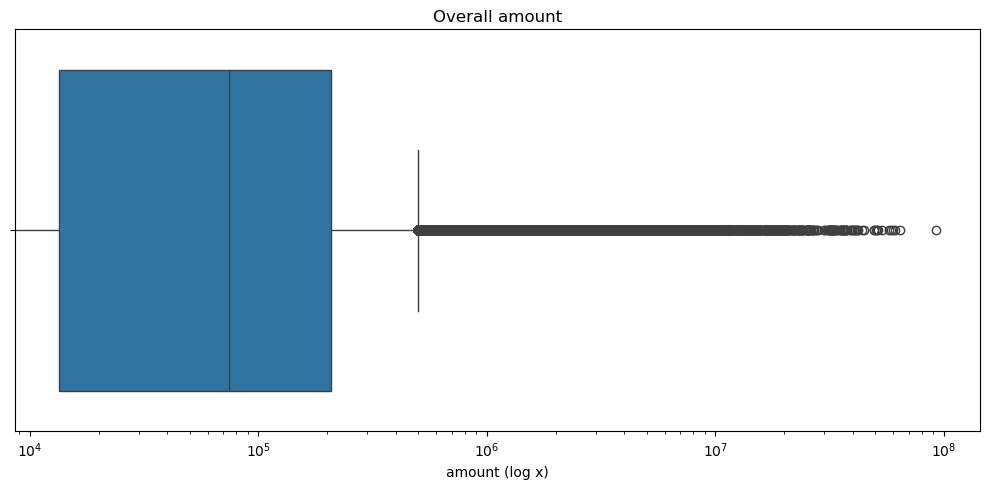

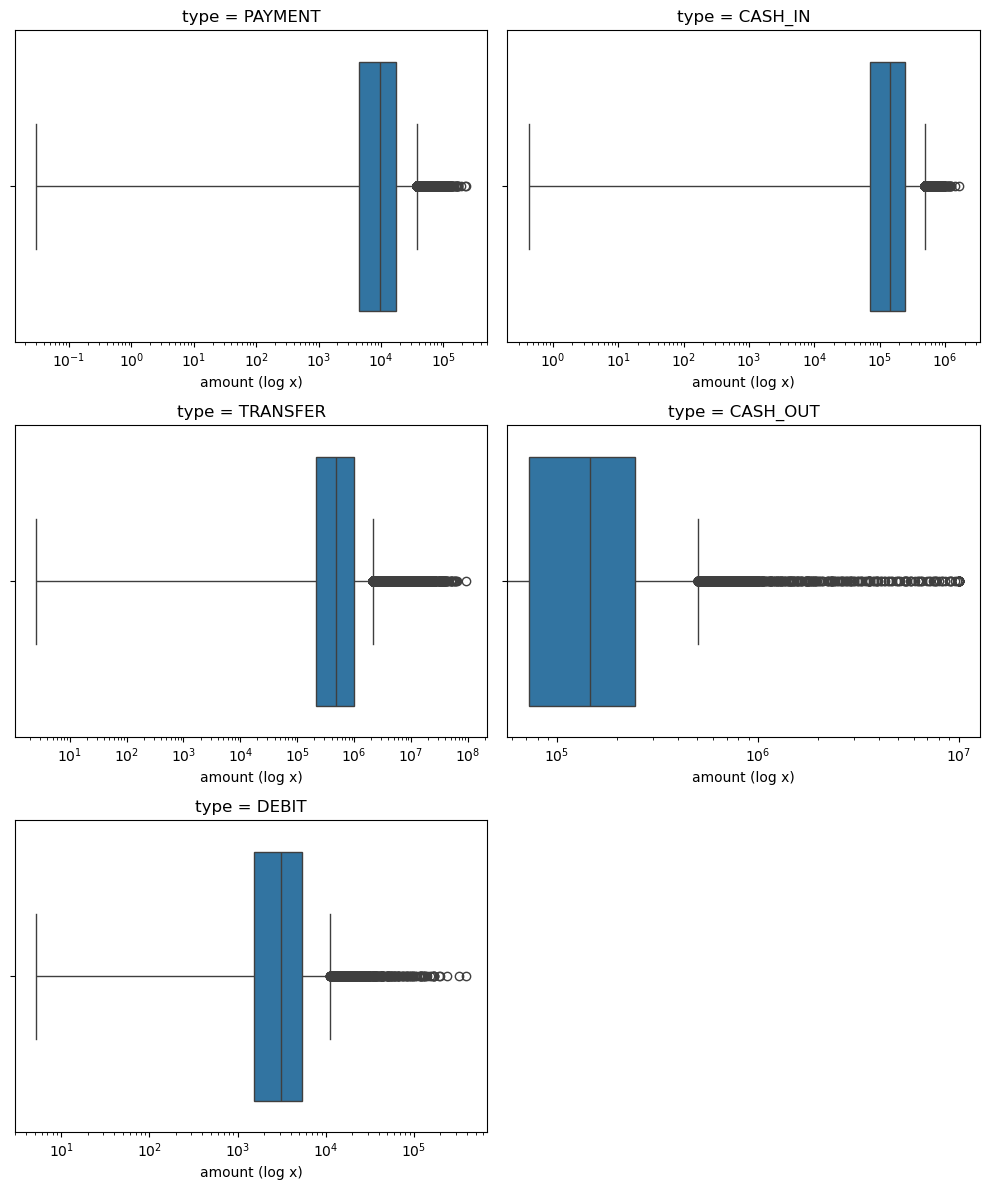

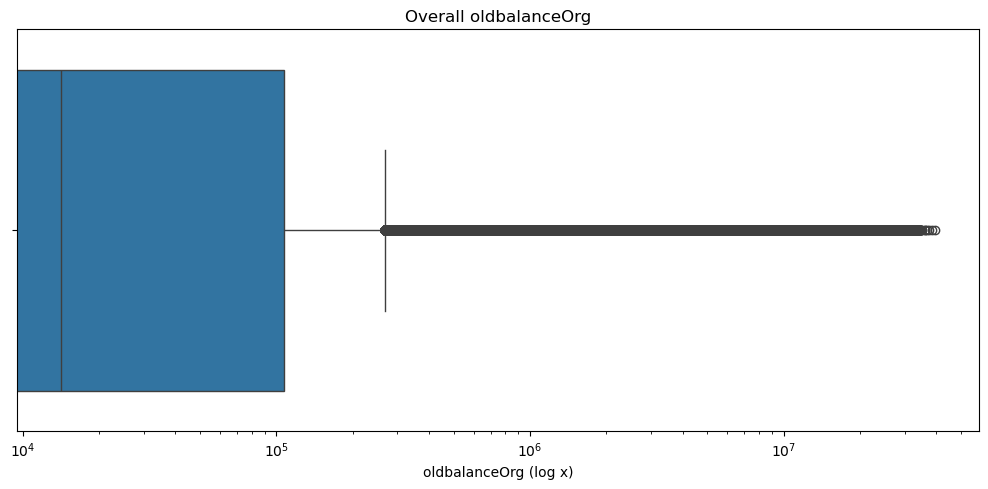

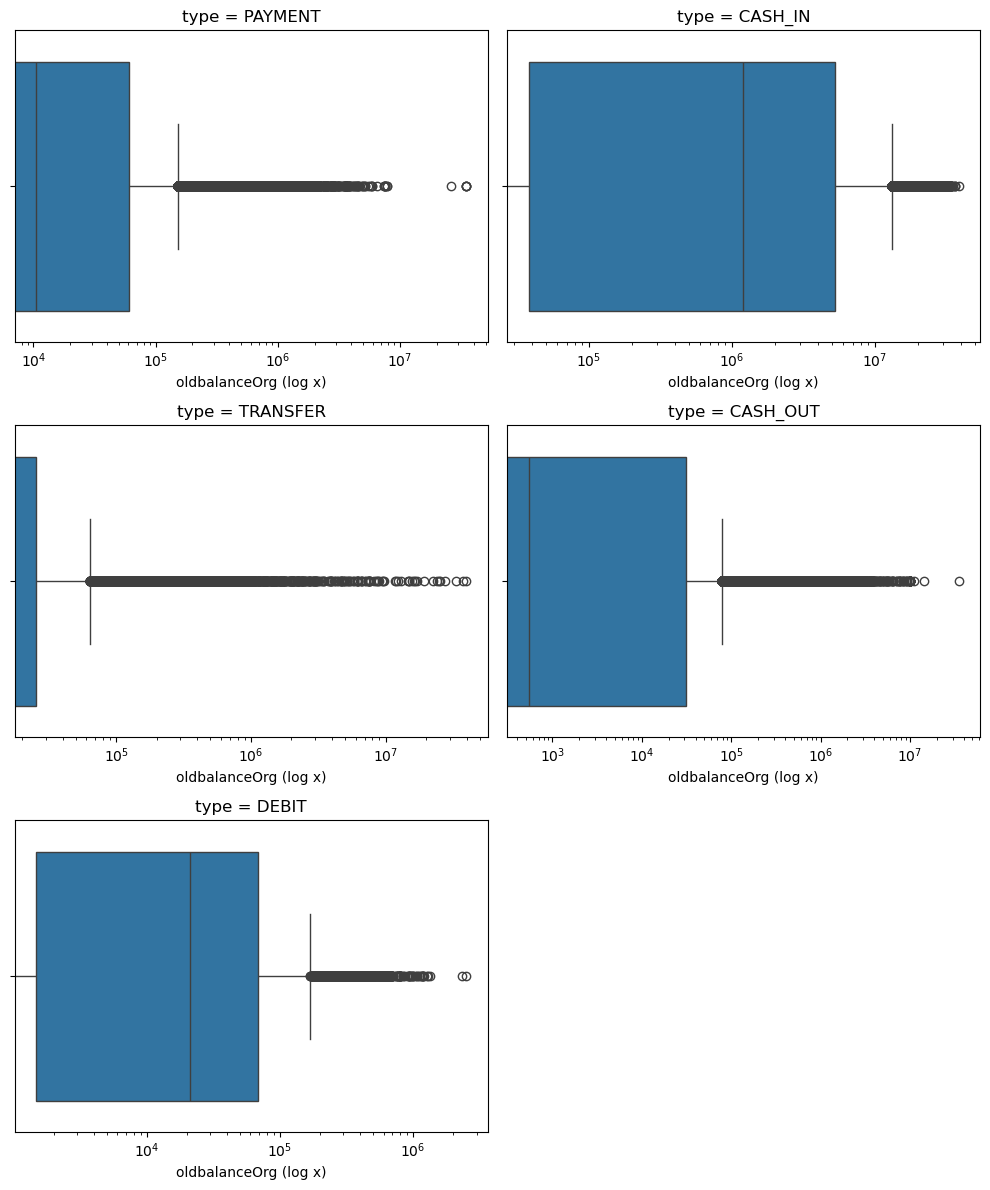

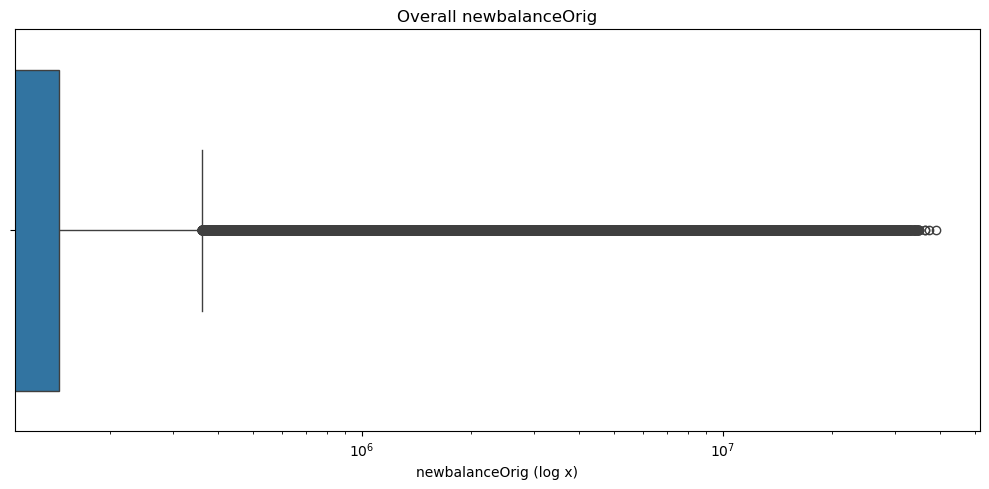

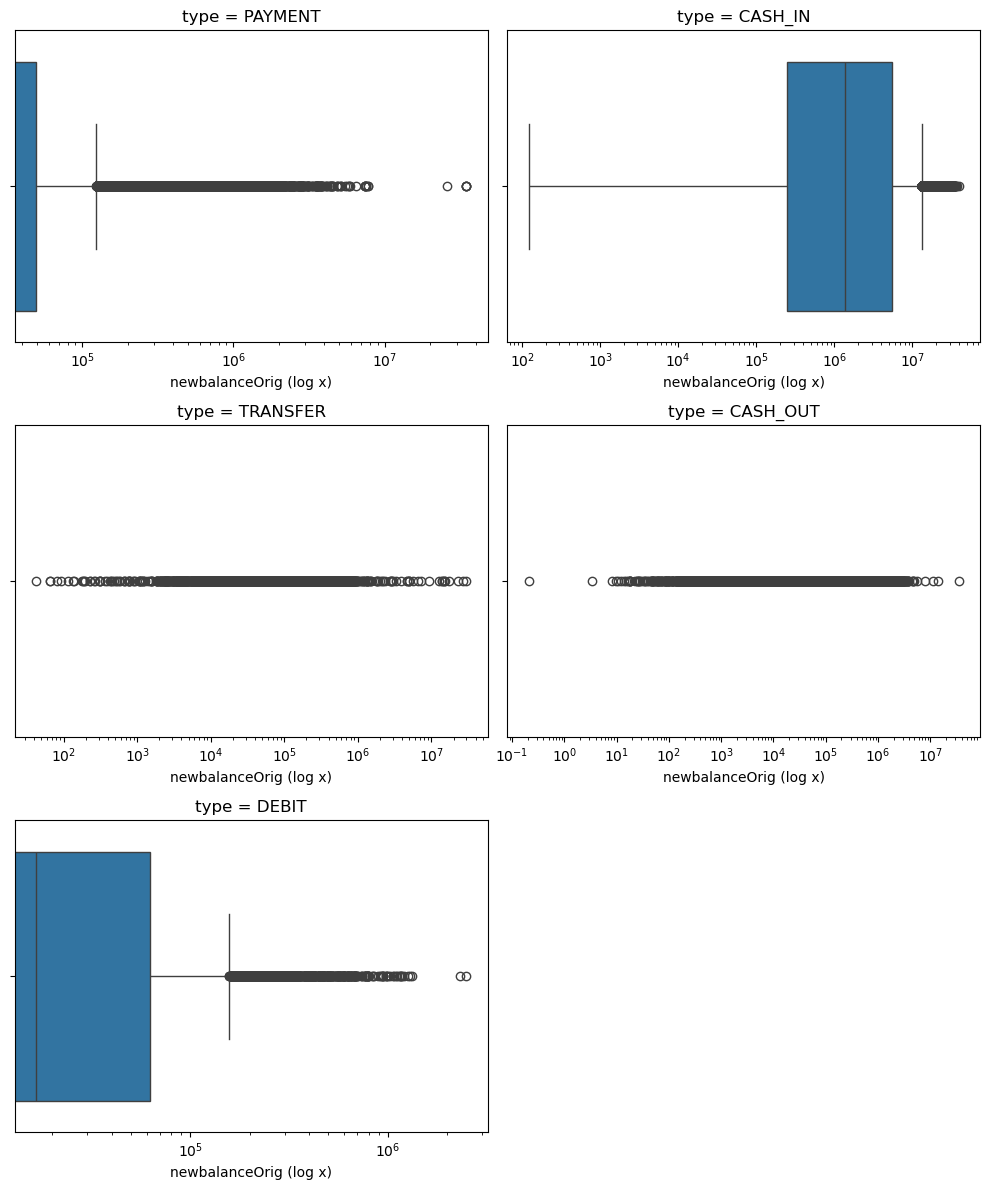

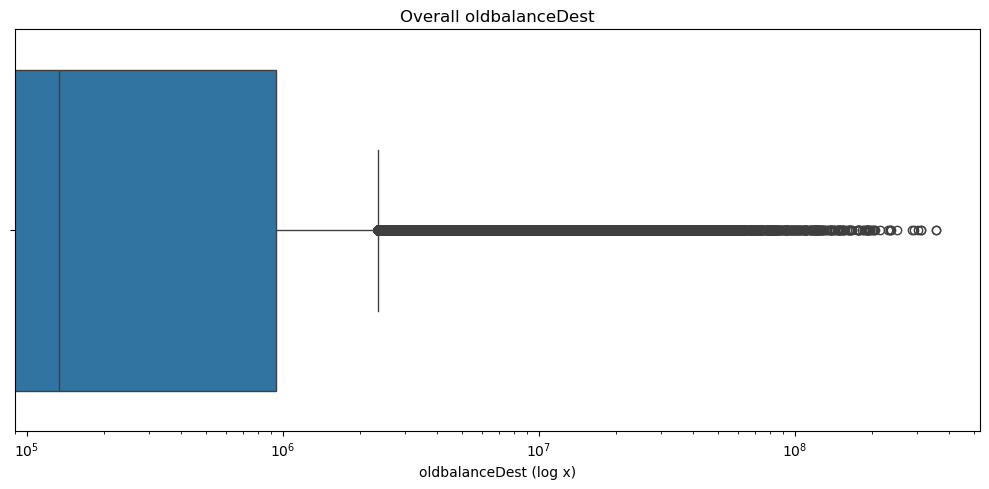

/var/folders/xn/q5_c27vd0dg24dy1lqs64p7c0000gn/T/ipykernel_88245/1791971056.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xscale('log')


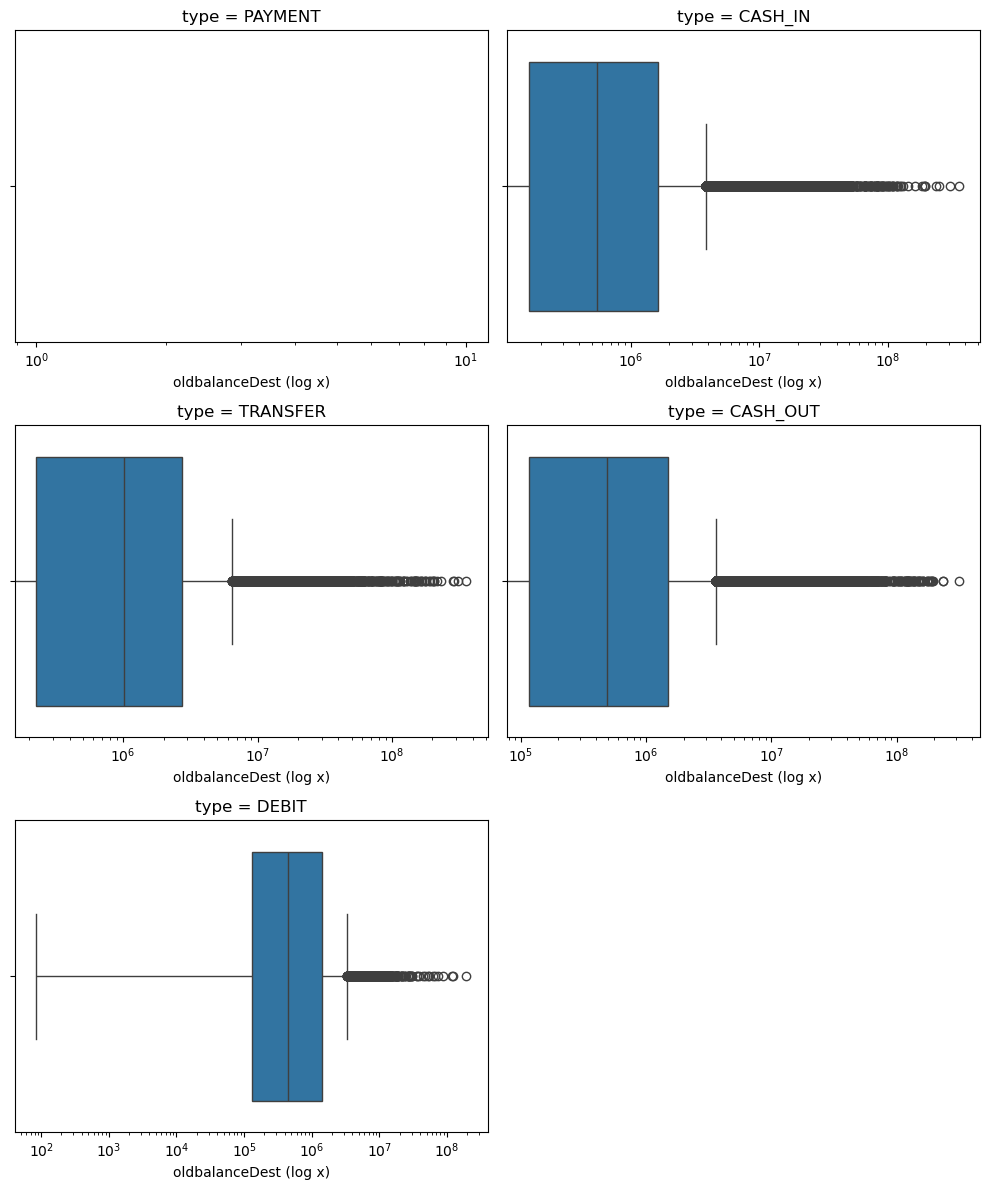

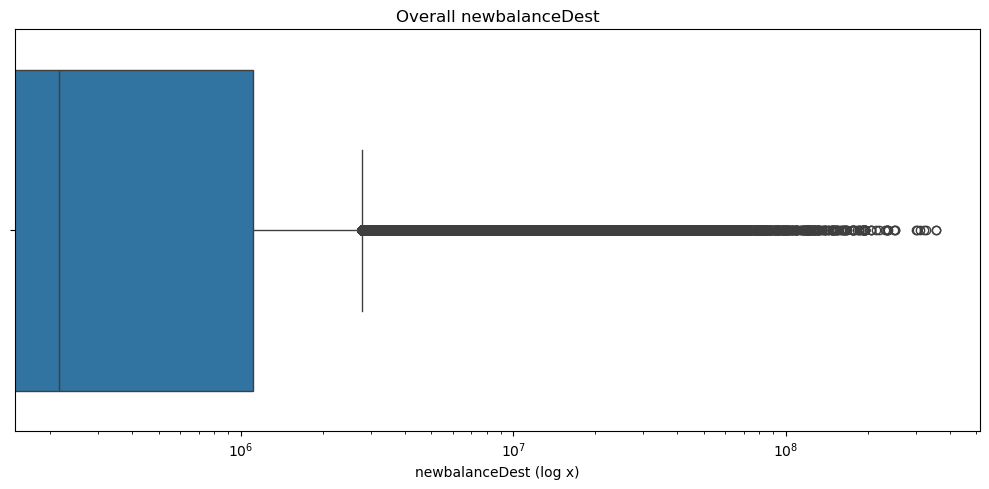

/var/folders/xn/q5_c27vd0dg24dy1lqs64p7c0000gn/T/ipykernel_88245/1791971056.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xscale('log')


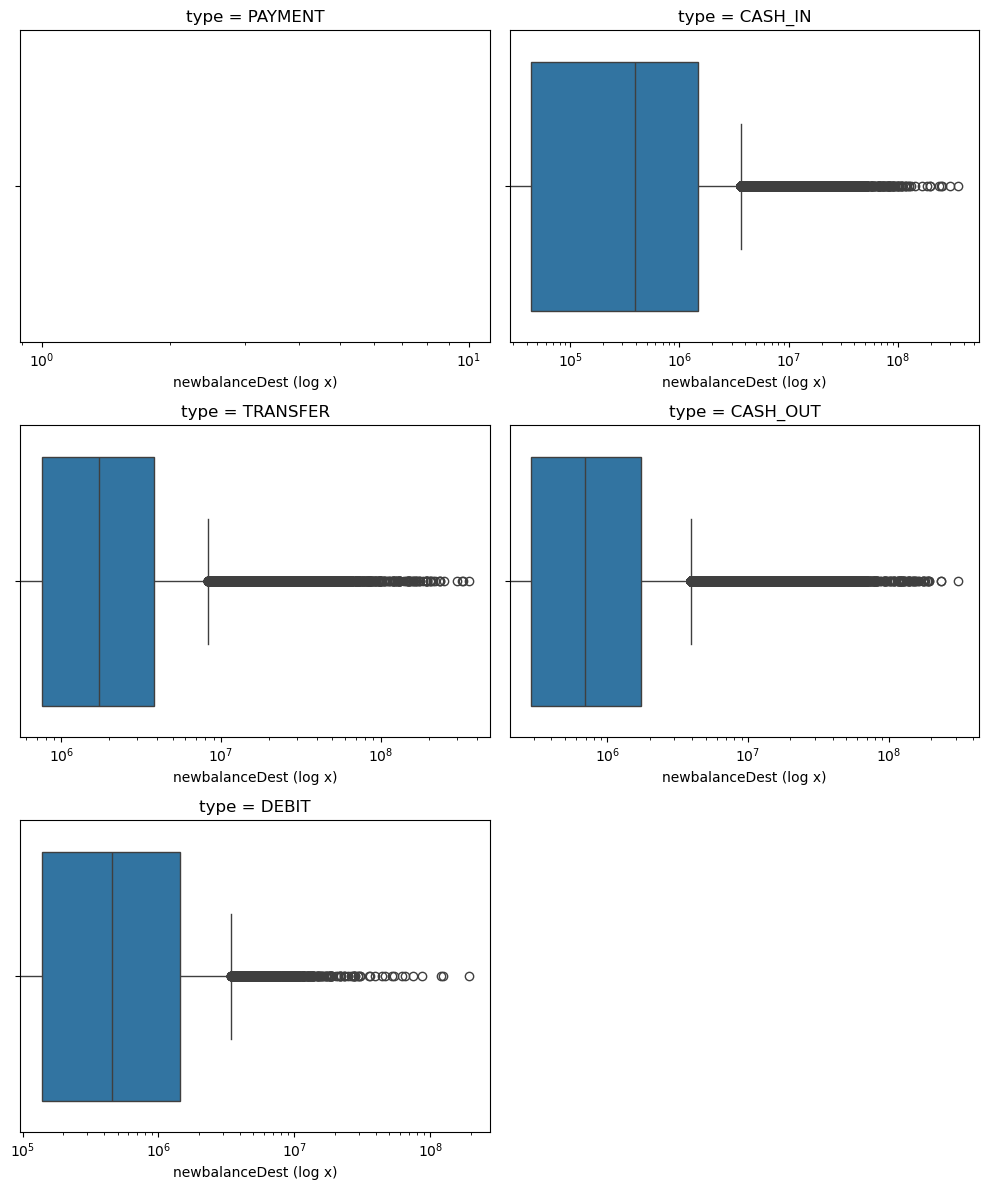

In [102]:
for col in numerical_cols:
    plot_feature_boxplot(transactions, col)

In [103]:
def plot_feature_distribution(
    df,
    feature,
    group_col='type',
    bins=30,
    kde=True
):
    """
    Plots the distribution of `feature`:
      - overall
      - one subplot per unique value in `group_col`
    
    """
    def _draw(ax, data, title):
        sns.histplot(data, kde=kde, ax=ax, bins=bins, log_scale=(True, False))
        ax.set_title(title)
        ax.set_xlabel(feature + ' (log x)')
        ax.set_ylabel('Density')
    
    _, ax = plt.subplots(figsize=(10, 5))
    _draw(ax, df[feature].dropna(), f'Overall {feature} distribution')
    plt.tight_layout()
    plt.show()
    
    groups = df[group_col].dropna().unique()
    n = len(groups)
    cols = 2
    rows = math.ceil(n / cols)
    _, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()
    
    for ax, grp in zip(axes, groups):
        data = df.loc[df[group_col] == grp, feature].dropna()
        _draw(ax, data, f'{group_col} = {grp}')
    
    for ax in axes[len(groups):]:
        ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()

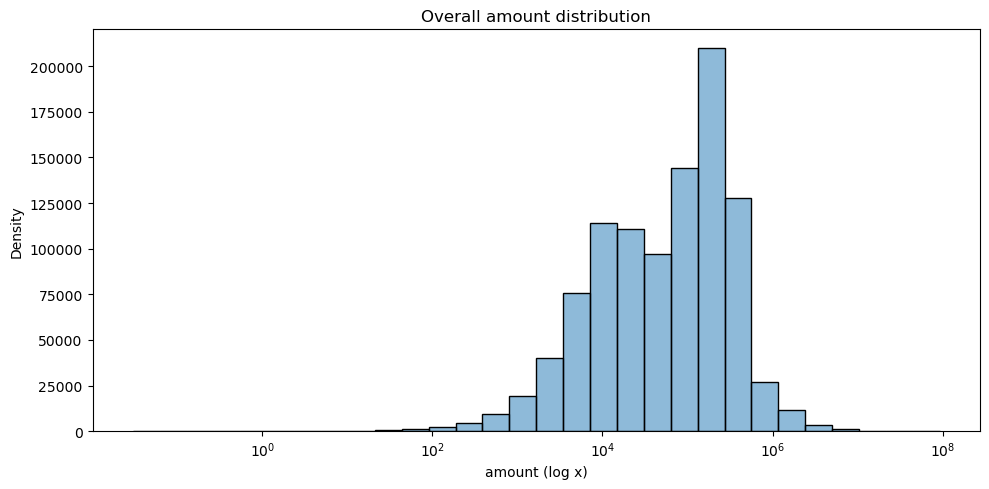

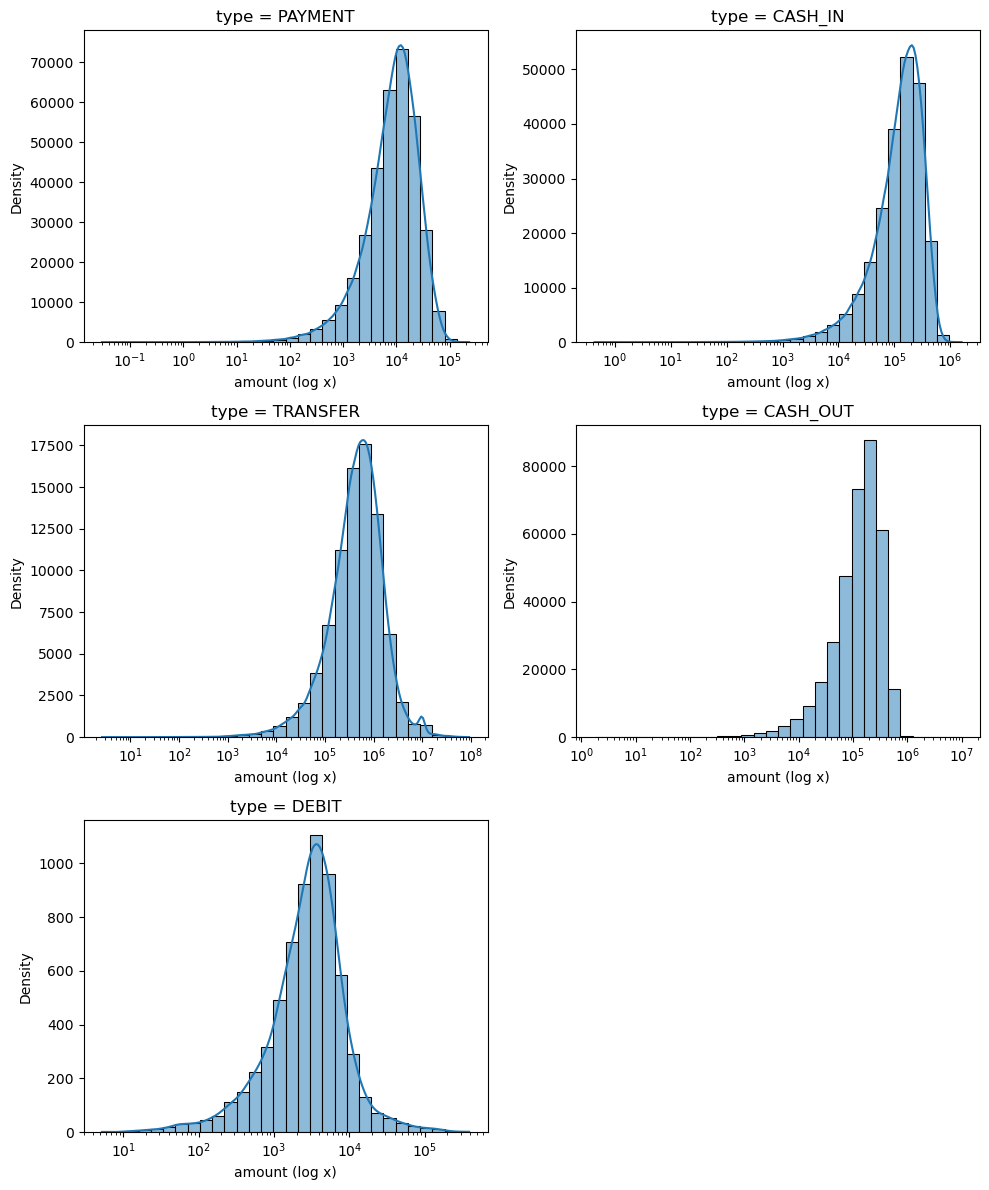

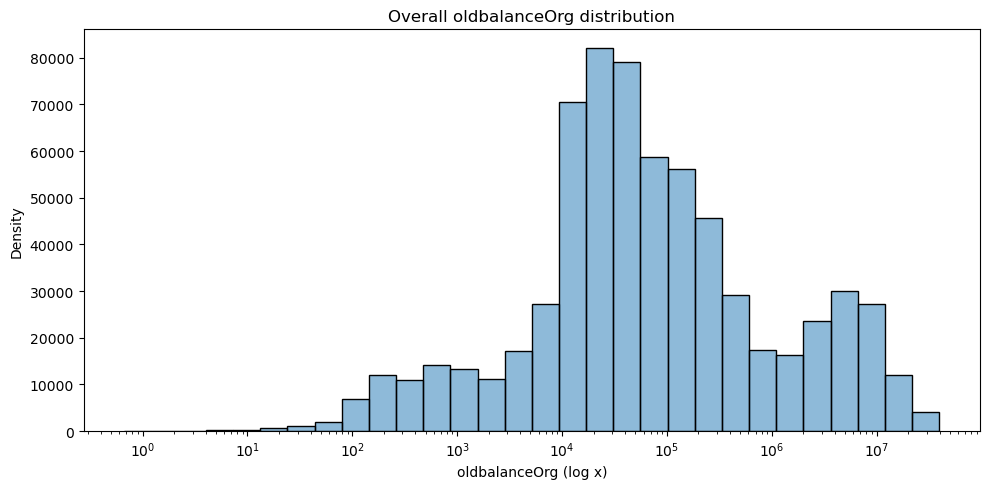

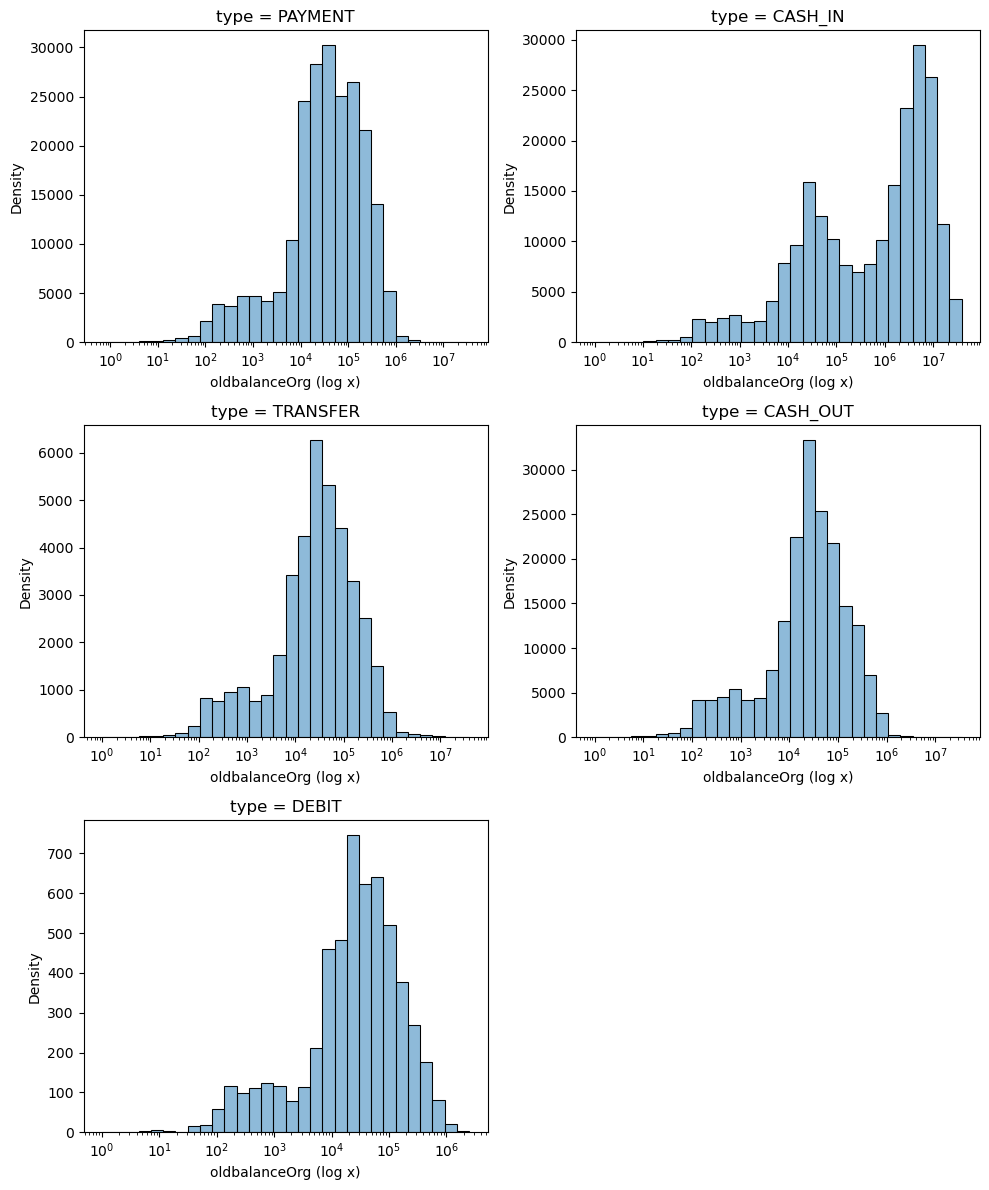

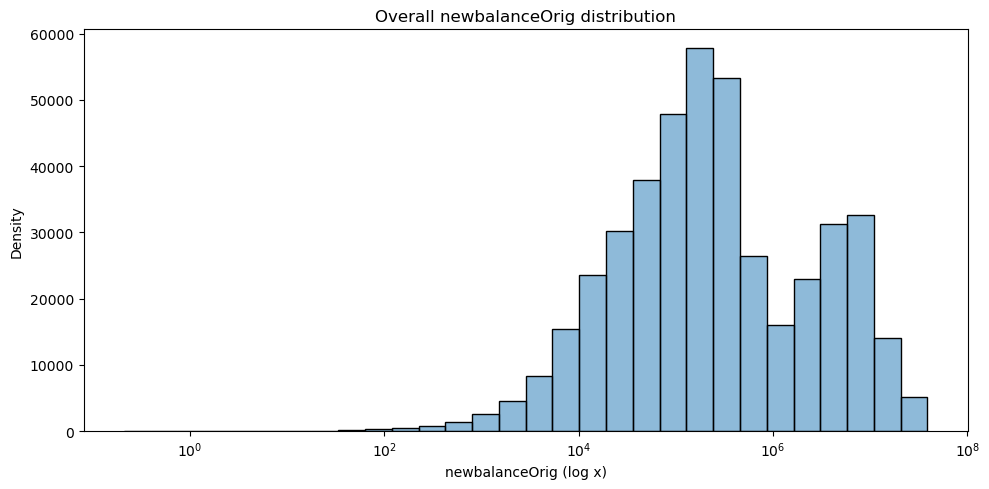

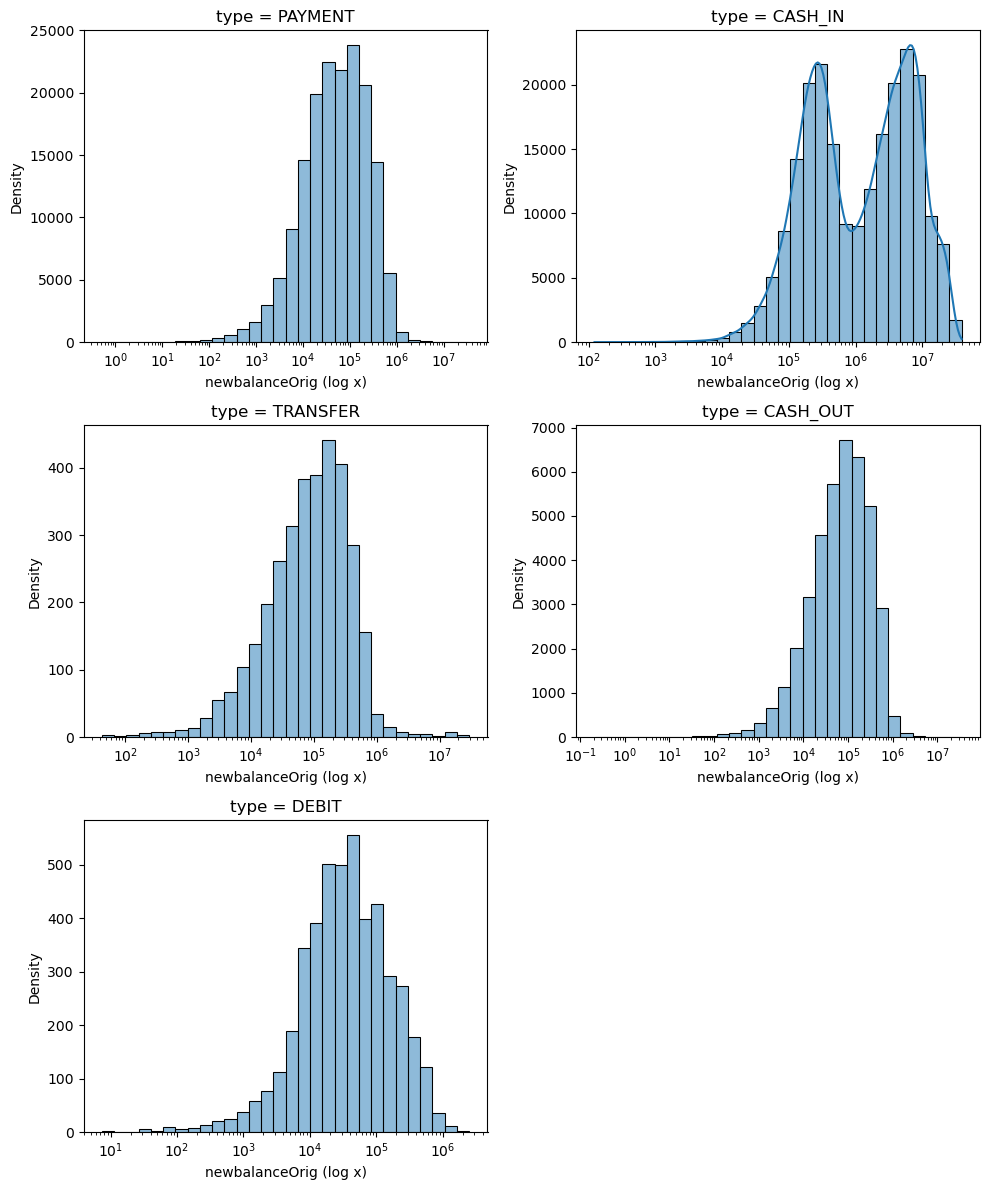

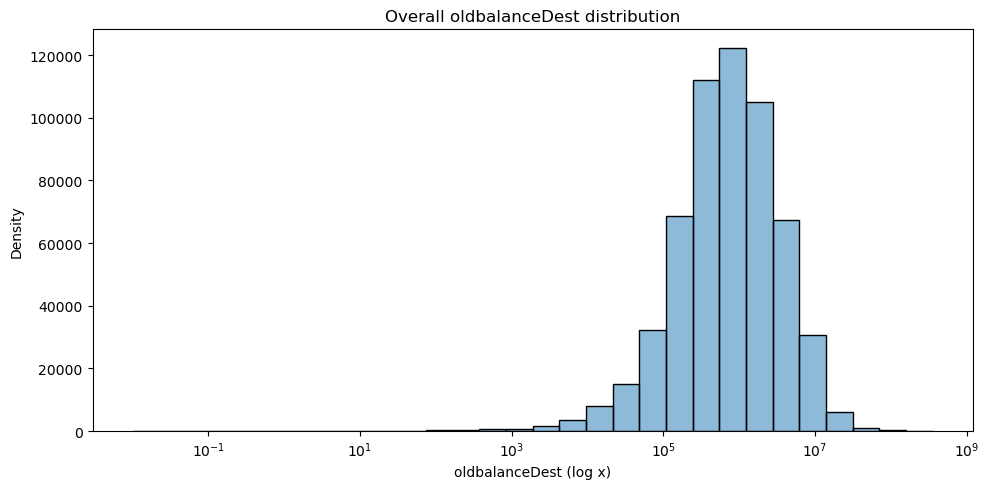

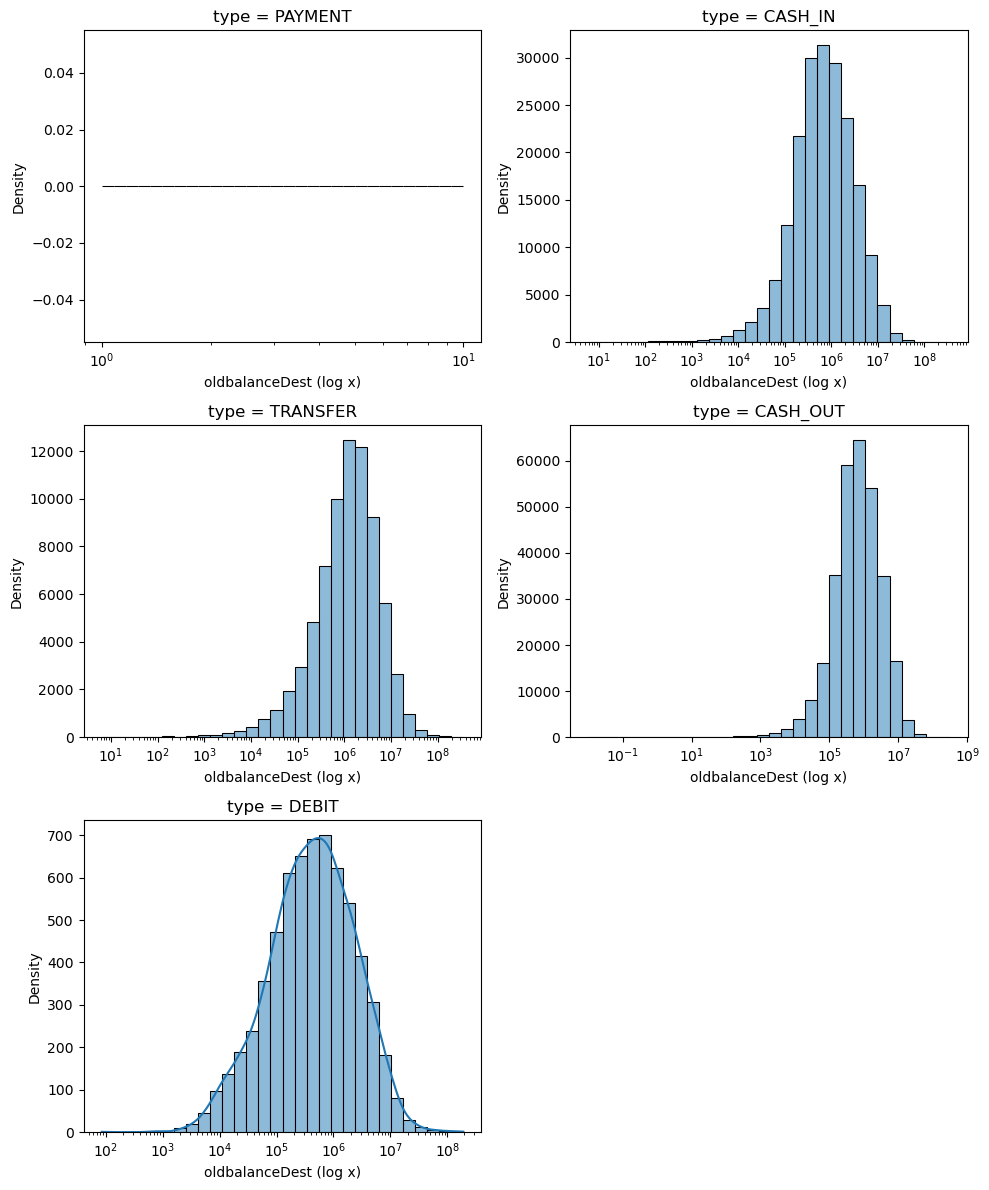

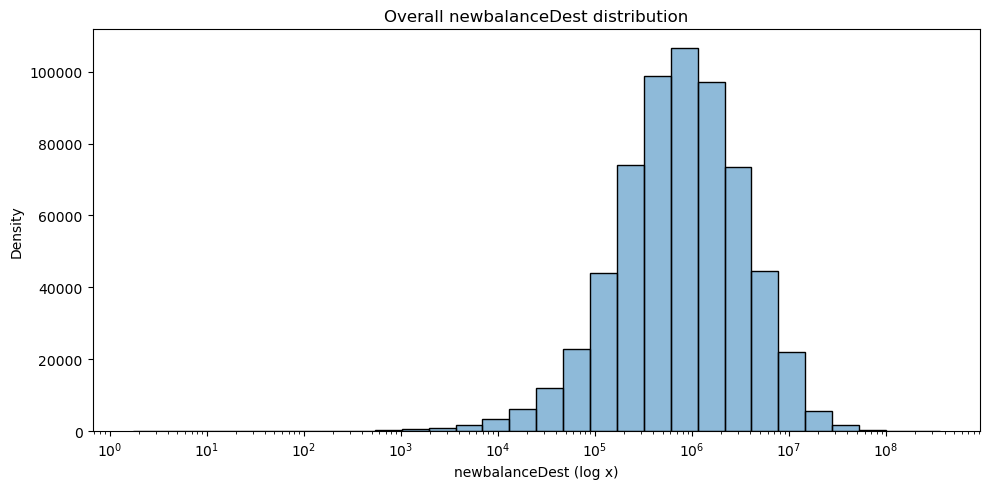

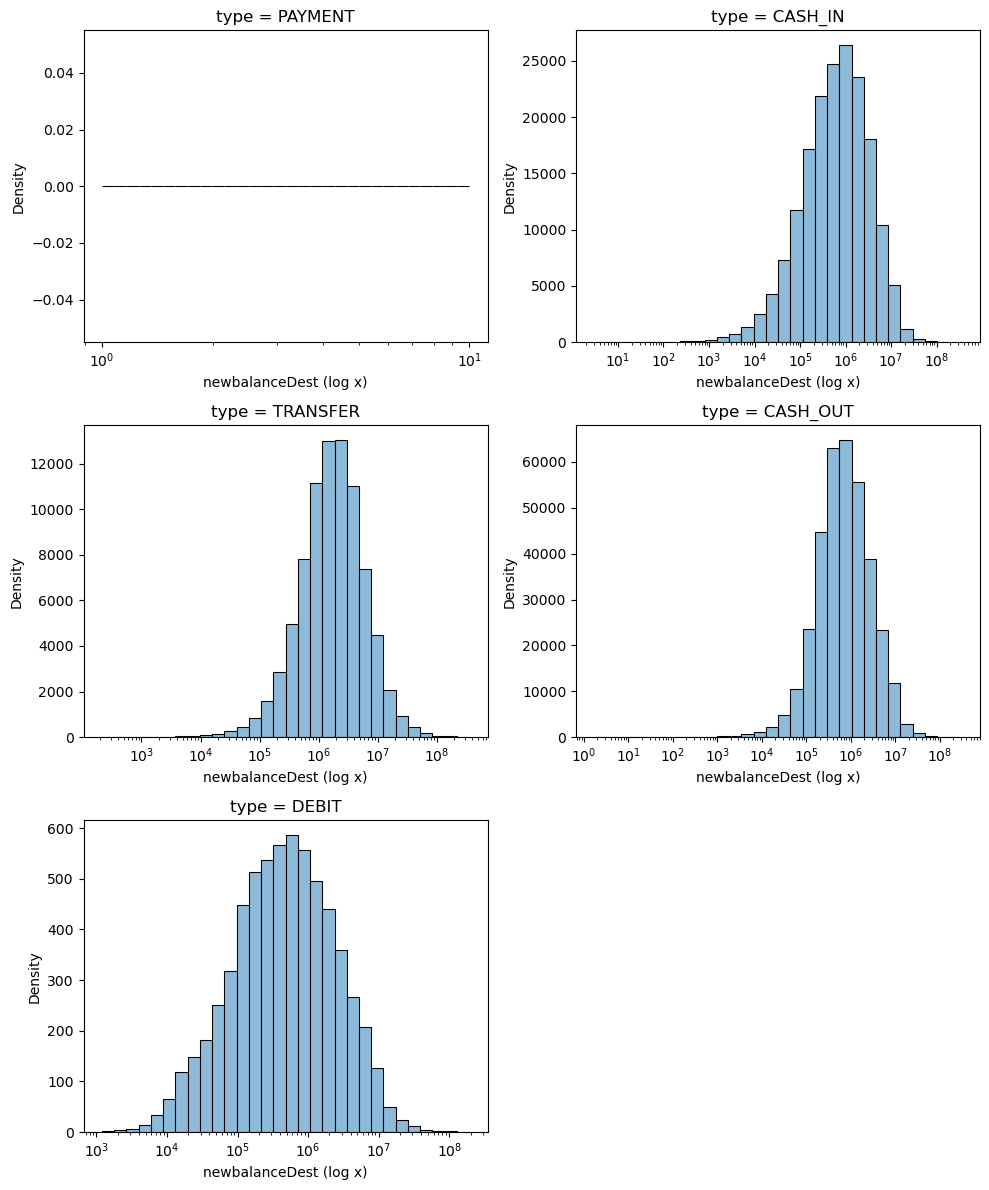

In [104]:
for col in numerical_cols:
    plot_feature_distribution(transactions, col)

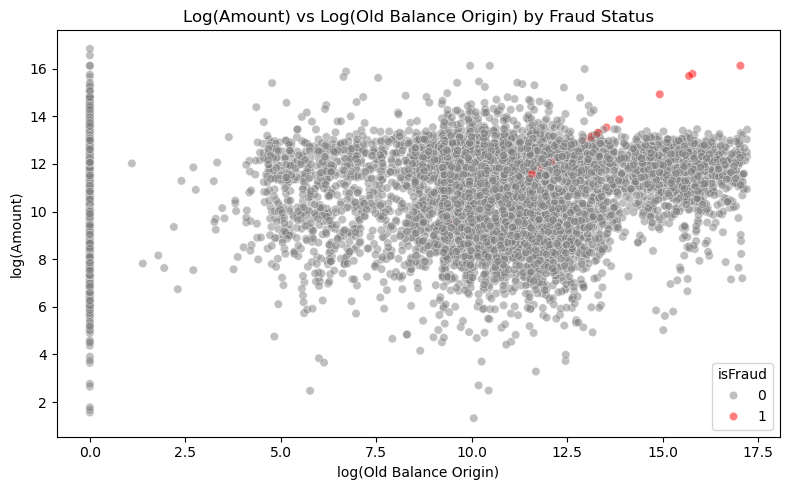

In [ ]:
df = transactions.copy()
df = df[df['amount'] > 0]  # avoid log issues
df['log_amount'] = np.log1p(df['amount'])
df['log_oldbalanceOrg'] = np.log1p(df['oldbalanceOrg'])

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df.sample(10000),  # reduce overplotting
    x='log_oldbalanceOrg',
    y='log_amount',
    hue='isFraud',
    alpha=0.5,
    palette={0: 'gray', 1: 'red'}
)
plt.title('Log(Amount) vs Log(Old Balance Origin) by Fraud Status')
plt.xlabel('log(Old Balance Origin)')
plt.ylabel('log(Amount)')
plt.legend(title='isFraud')
plt.tight_layout()
plt.show()

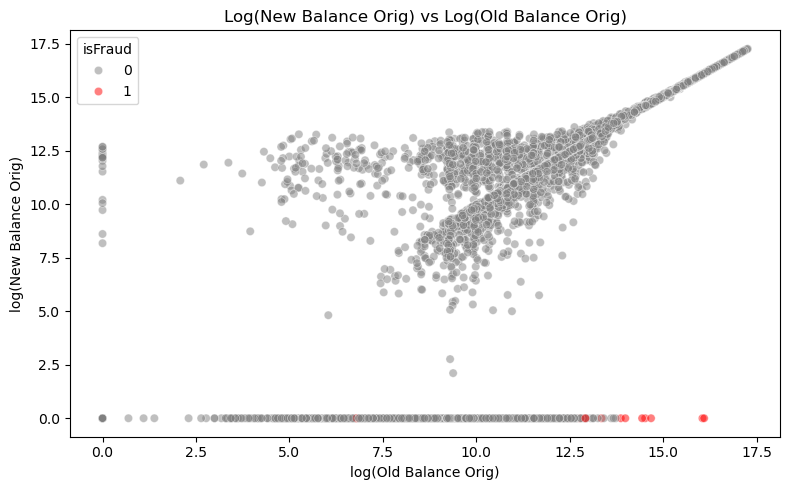

In [106]:
df['log_newbalanceOrig'] = np.log1p(df['newbalanceOrig'])

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df.sample(10000),
    x='log_oldbalanceOrg',
    y='log_newbalanceOrig',
    hue='isFraud',
    alpha=0.5,
    palette={0: 'gray', 1: 'red'}
)
plt.title('Log(New Balance Orig) vs Log(Old Balance Orig)')
plt.xlabel('log(Old Balance Orig)')
plt.ylabel('log(New Balance Orig)')
plt.legend(title='isFraud')
plt.tight_layout()
plt.show()

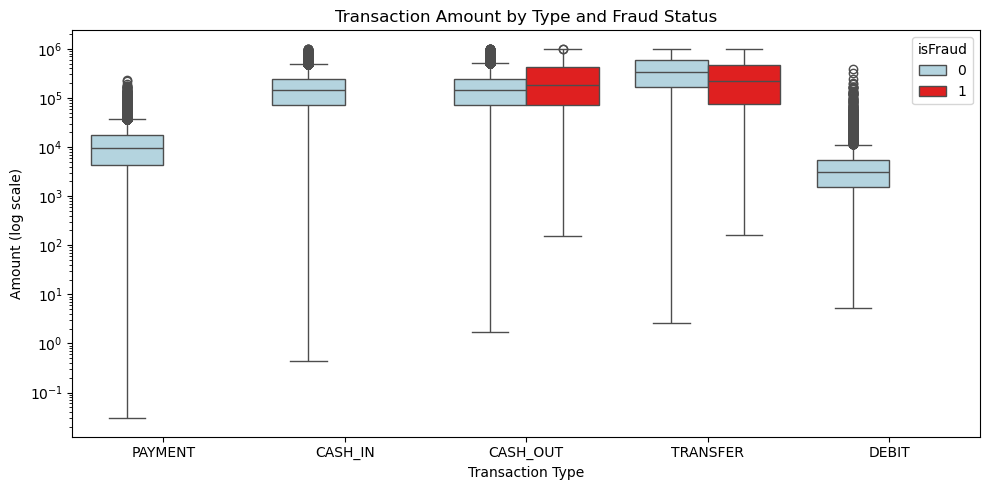

In [107]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df[df['amount'] < 1e6],  # exclude extreme outliers
    x='type',
    y='amount',
    hue='isFraud',
    palette={0: 'lightblue', 1: 'red'}
)
plt.yscale('log')
plt.title('Transaction Amount by Type and Fraud Status')
plt.ylabel('Amount (log scale)')
plt.xlabel('Transaction Type')
plt.tight_layout()
plt.show()

In [108]:
amount_summary = (
    transactions
    .groupby(['type', 'isFraud'])['amount']
    .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
    .reset_index()
    .sort_values(by=['type', 'isFraud'])
)

display(amount_summary)

,type,isFraud,count,mean,median,min,max,std
0,CASH_IN,0,219955,1.689289e+05,142942.99,0.43,1609288.13,1.267864e+05
1,CASH_OUT,0,350703,1.734277e+05,146085.00,1.74,2393198.44,1.310352e+05
2,CASH_OUT,1,657,1.326971e+06,374178.28,0.00,10000000.00,2.244505e+06
3,DEBIT,0,6417,5.445891e+03,3099.53,5.24,389762.68,1.302416e+04
4,PAYMENT,0,338573,1.305559e+04,9481.67,0.03,230549.18,1.256291e+04
5,TRANSFER,0,83055,9.081874e+05,488022.88,2.60,92445516.64,1.892640e+06
6,TRANSFER,1,640,1.384176e+06,454774.80,164.00,10000000.00,2.262100e+06


In [109]:
conf_matrix = pd.crosstab(
    transactions['isFraud'],
    transactions['isFlaggedFraud'],
    rownames=['Actual (isFraud)'],
    colnames=['Flagged (isFlaggedFraud)']
)

display(conf_matrix)

Flagged (isFlaggedFraud),0,1
Actual (isFraud),,
0,998703,0
1,1296,1


In [110]:
TP = conf_matrix.loc[1, 1] if (1 in conf_matrix.index and 1 in conf_matrix.columns) else 0
FP = conf_matrix.loc[0, 1] if (0 in conf_matrix.index and 1 in conf_matrix.columns) else 0
FN = conf_matrix.loc[1, 0] if (1 in conf_matrix.index and 0 in conf_matrix.columns) else 0
TN = conf_matrix.loc[0, 0] if (0 in conf_matrix.index and 0 in conf_matrix.columns) else 0

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
f1        = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')

Precision: 1.0000
Recall:    0.0008
F1 Score:  0.0015


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

- **Right-skewed**: all numeric fields (amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest) have  
  - a huge spike at low values  
  - a long tail of rare, high-value transactions  
- **Log scale**: most transactions fall between 10¹–10⁵; a few outliers reach 10⁶–10⁸  
- **Stats**: median ≪ mean (“whales” pull the average up)  
- **Implications**:  
  - Typical transactions are small  
  - Use log-transforms or cap extremes (e.g. 99th percentile) for modeling and visualization  

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

- **Fraud clusters** appear in specific value ranges:
  - In `TRANSFER` and `CASH_OUT` types, fraudulent amounts are consistently **high**, often exceeding 100,000.
  - Fraudulent transactions tend to leave the **origin account empty** (`newbalanceOrig ≈ 0`) and often begin with **non-zero balances**.

- **amount vs oldbalanceOrg**:
  - Fraud points lie along a diagonal in high-value ranges (log-scale 12–17), where `amount ≈ oldbalanceOrg`.
  - This suggests attackers often **drain accounts fully**, a pattern not common in non-fraud.

- **oldbalanceOrg vs newbalanceOrig**:
  - Fraudulent transactions concentrate at `newbalanceOrig = 0`, confirming complete withdrawal behavior.
  - Non-fraud cases show more spread and follow expected balance reductions.

**Conclusion**:  
Fraud tends to happen in **high-amount, full-drain** transactions—especially in **TRANSFER** and **CASH_OUT**—while non-fraud behavior is more variable and conservative.

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

- **TRANSFER** transactions have the **highest typical amounts**:
  - Median: ~488K; Max: 92M
  - Very high variability and skew; used mostly for large-value moves.

- **CASH_OUT** and **CASH_IN** are next:
  - Median amounts: ~146K (CASH_OUT), ~142K (CASH_IN)
  - Typical for larger personal or business withdrawals and deposits.

- **PAYMENT** and **DEBIT** are much smaller:
  - Median amounts: ~9.4K (PAYMENT), ~3K (DEBIT)
  - Suggest frequent, low-value consumer-level transactions.

- **Balance Features Match the Pattern**:
  - High-value types (TRANSFER, CASH_OUT, CASH_IN) are also associated with large `oldbalance` and `newbalance` values.
  - PAYMENT consistently shows `oldbalanceDest` and `newbalanceDest` as **zero**, indicating it's likely internal and doesn’t affect destination balances.

**Conclusion**:  
Transaction types differ significantly in scale. **TRANSFER** stands out as the highest-value and most variable type, while **PAYMENT** and **DEBIT** represent small, low-risk transactions.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

- **Fraud occurs only in TRANSFER and CASH_OUT types**.
- In both cases, **fraudulent transactions have significantly higher average amounts** than non-fraudulent ones:
  - **CASH_OUT**:
    - Fraud mean: \$1.33M vs Non-fraud mean: \$173K
  - **TRANSFER**:
    - Fraud mean: \$1.38M vs Non-fraud mean: \$908K

- **Median values** also follow this trend, though the difference is smaller:
  - Fraud medians in both types still exceed 370K.

- Other types (**PAYMENT, DEBIT, CASH_IN**) show **no fraud**, and have much smaller amounts (median: 3K–143K).

**Conclusion**:  
Fraudulent transactions are concentrated in **high-value CASH_OUT and TRANSFER types**, and tend to involve **much larger amounts** than typical transactions of the same type.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here

- **Confusion Matrix**:

| Actual (isFraud) | Flagged = 0 | Flagged = 1 |
|------------------|-------------|-------------|
| 0 (not fraud)    | 998,703     | 0           |
| 1 (fraud)        | 1,296       | 1           |

- **Precision**: 1.00  
  → The one flagged transaction was indeed fraud.

- **Recall**: 0.0008  
  → Out of 1,297 actual frauds, the system flagged **only one**.

- **F1 Score**: 0.0015  
  → Very poor balance between precision and recall.

**Conclusion**:  
The current rule-based flagging system is extremely **conservative**—it avoids false positives entirely but **fails to detect nearly all frauds**. A machine learning–based model is needed to improve recall while maintaining precision.